In [106]:
dat_all <- read.csv('train.csv')
dat <- dat_all[,-1]

In [88]:
colnames(dat)[sapply(dat, function(x) sum(is.na(x)))!=0]

[1] "LotFrontage"  "Alley"        "MasVnrType"   "MasVnrArea"   "BsmtQual"    
 [6] "BsmtCond"     "BsmtExposure" "BsmtFinType1" "BsmtFinType2" "Electrical"  
[11] "FireplaceQu"  "GarageType"   "GarageYrBlt"  "GarageFinish" "GarageQual"  
[16] "GarageCond"   "PoolQC"       "Fence"        "MiscFeature"

In [89]:
dat_all$Id[rowSums(is.na(dat))>10]

[1]   40  288  343  376  521  534  706 1012 1031 1036 1144 1180 1219 1322

So we have many rows with more than 10 Na, and many col with Na

In [28]:
require(VIM)
require(mice, quietly = 1)

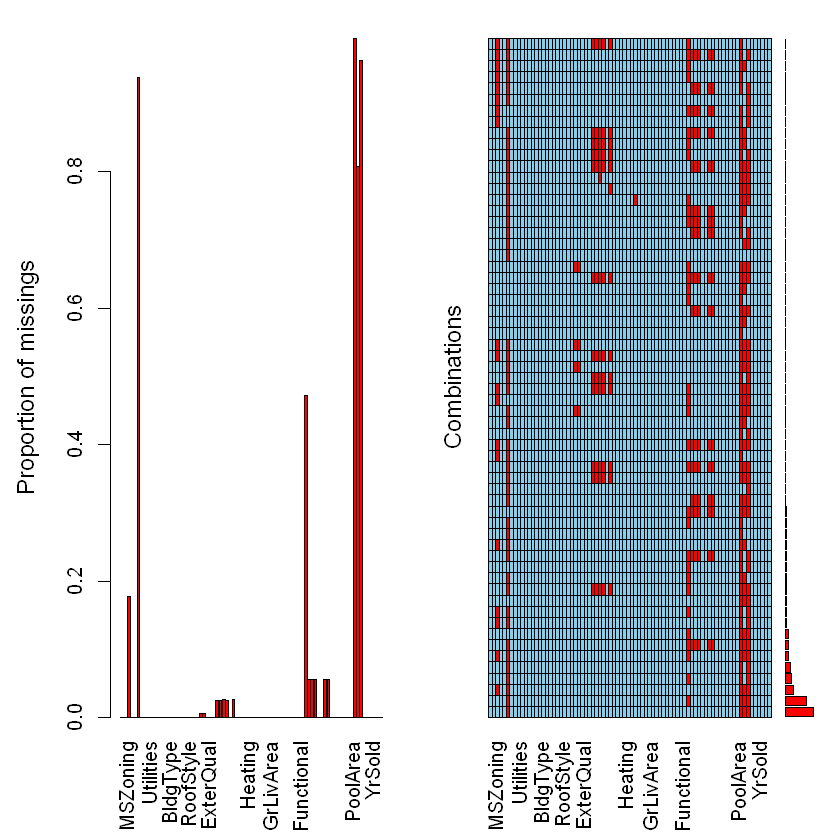

In [55]:
aggr(dat)

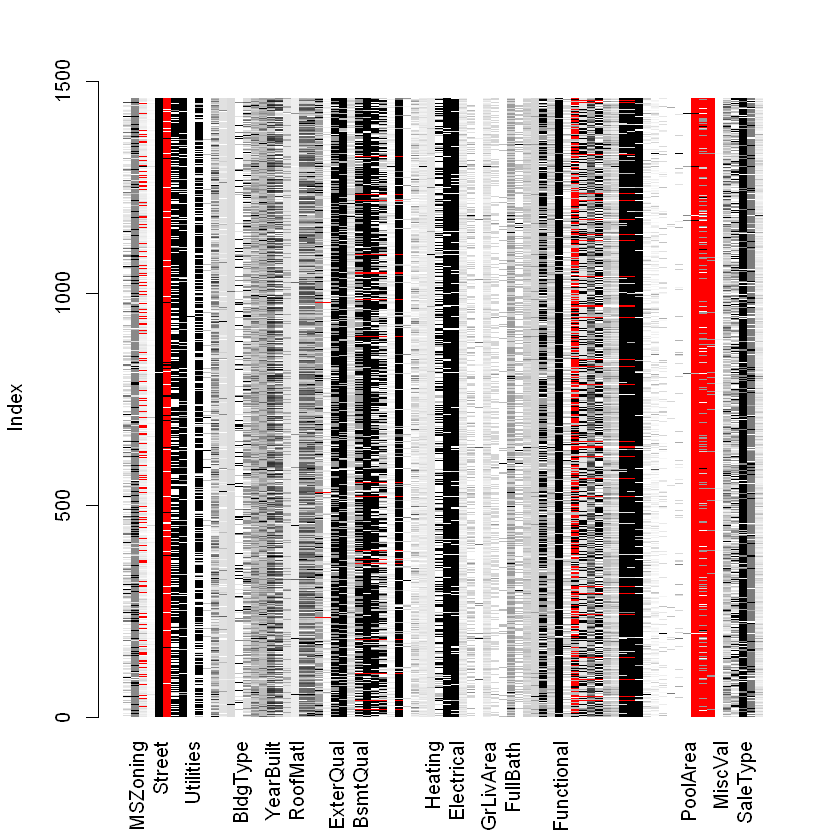

In [56]:
matrixplot(dat)

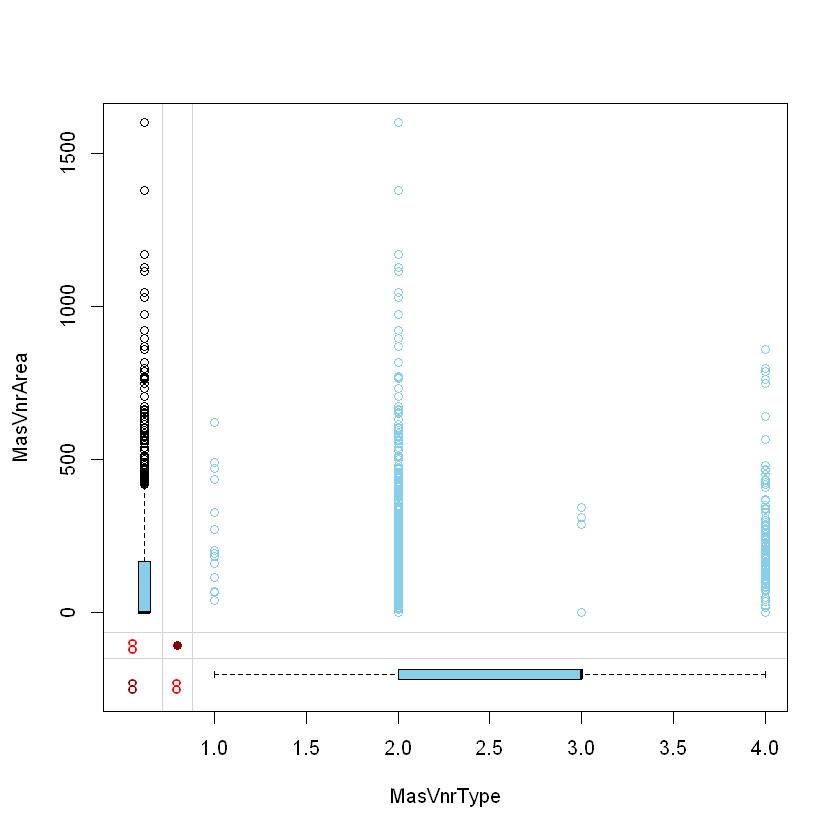

In [237]:
## Margin plot. Red dots have at least one missing. No observation with two missing values here.
marginplot(dat[,c("MasVnrType","MasVnrArea")])

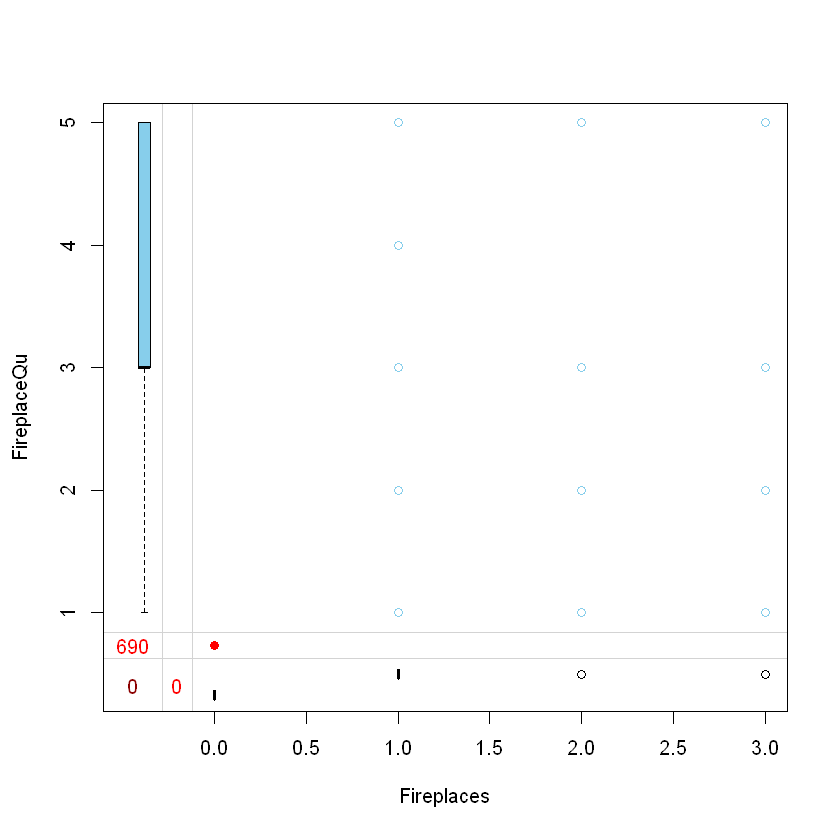

In [209]:
## Margin plot. Red dots have at least one missing. No observation with two missing values here.
marginplot(dat[,c("Fireplaces","FireplaceQu")])

From this last plot is obviouse that were the Pool Area is zero we have missing value for Pool Quality, soo...

In [424]:
dat_all <- read.csv('train.csv')
dat <- dat_all[,-1]

library(plyr)

#dat[,'PoolQC'] <- revalue(dat[,'PoolQC'], c('Ex'=1, 'Gd'=2, 'Fa'=3)) # So Ex is 1 , Gd = 2 and Fa = 3
levels(dat[,'PoolQC']) <- c(levels(dat[,'PoolQC']),0)
dat[is.na(dat[,'PoolQC']),'PoolQC'] <- 0 # Na is no Pool

#dat[,'MiscFeature'] <- revalue(dat[,'MiscFeature'], c('Shed'=3, 'Gar2'=1, 'Othr'=2,'TenC'=4)) #Shed = 3, Gar2 = 1, Othr = 2, TenC =4
levels(dat[,'MiscFeature']) <- c(levels(dat[,'MiscFeature']),0)
dat[is.na(dat[,'MiscFeature']),'MiscFeature'] <- 0 # Na is None  

#dat[,'Alley'] <- revalue(dat[,'Alley'], c('Grvl'=1, 'Pave'=2)) 
levels(dat[,'Alley']) <- c(levels(dat[,'Alley']),0)
dat[is.na(dat[,'Alley']),'Alley'] <- 0 

#dat[,'Fence'] <- revalue(dat[,'Fence'], c('MnPrv'=1, 'GdWo'=2, 'GdPrv'=3,'MnWw'=4)) 
levels(dat[,'Fence']) <- c(levels(dat[,'Fence']),0)
dat[is.na(dat[,'Fence']),'Fence'] <- 0 

#dat[,'FireplaceQu'] <- revalue(dat[,'FireplaceQu'], c('Ex'=1, 'Gd'=2, 'TA'=3,'Fa'=4, 'Po'=5)) 
levels(dat[,'FireplaceQu']) <- c(levels(dat[,'FireplaceQu']),0)
dat[is.na(dat[,'FireplaceQu']),'FireplaceQu'] <- 0 

levels(dat[,'GarageType']) <- c(levels(dat[,'GarageType']),0)
dat[is.na(dat[,'GarageType']),'GarageType'] <- 0 

levels(dat[,'GarageYrBlt']) <- c(levels(dat[,'GarageYrBlt']),0)
dat[is.na(dat[,'GarageYrBlt']),'GarageYrBlt'] <- 0 

levels(dat[,'GarageFinish']) <- c(levels(dat[,'GarageFinish']),0)
dat[is.na(dat[,'GarageFinish']),'GarageFinish'] <- 0 

levels(dat[,'GarageQual']) <- c(levels(dat[,'GarageQual']),0)
dat[is.na(dat[,'GarageQual']),'GarageQual'] <- 0 

levels(dat[,'GarageCond']) <- c(levels(dat[,'GarageCond']),0)
dat[is.na(dat[,'GarageCond']),'GarageCond'] <- 0 

levels(dat[,'BsmtQual']) <- c(levels(dat[,'BsmtQual']),0)
dat[is.na(dat[,'BsmtQual']),'BsmtQual'] <- 0 

levels(dat[,'BsmtCond']) <- c(levels(dat[,'BsmtCond']),0)
dat[is.na(dat[,'BsmtCond']),'BsmtCond'] <- 0 

levels(dat[,'BsmtExposure']) <- c(levels(dat[,'BsmtExposure']),0)
dat[is.na(dat[,'BsmtExposure']),'BsmtExposure'] <- 0 

levels(dat[,'BsmtFinType1']) <- c(levels(dat[,'BsmtFinType1']),0)
dat[is.na(dat[,'BsmtFinType1']),'BsmtFinType1'] <- 0 

levels(dat[,'BsmtFinType2']) <- c(levels(dat[,'BsmtFinType2']),0)
dat[is.na(dat[,'BsmtFinType2']),'BsmtFinType2'] <- 0 

dat[is.na(dat[,'MasVnrType']),'MasVnrType'] <- 'None' 

dat[is.na(dat[,'MasVnrArea']),'MasVnrArea'] <- 0

dat[is.na(dat[,'LotFrontage']),'LotFrontage'] <- 0 # I assume that ra values are no frontage

require(caret, quietly = 1)

final_data <- complete(mice(dat,m=1,method='cart', maxit = 1, seed=1,diagnostics = 0),1)
dat[,'Electrical'] = final_data$Electrical
#final_d_train <- dat
sale_Price_train <- dat$SalePrice


 iter imp variable
  1   1  Electrical


In [425]:
# test data clean
dat_all <- read.csv('test.csv')
dat <- dat_all[,-1]

library(plyr)

#dat[,'PoolQC'] <- revalue(dat[,'PoolQC'], c('Ex'=1, 'Gd'=2, 'Fa'=3)) # So Ex is 1 , Gd = 2 and Fa = 3
levels(dat[,'PoolQC']) <- c(levels(dat[,'PoolQC']),0)
dat[is.na(dat[,'PoolQC']),'PoolQC'] <- 0 # Na is no Pool

#dat[,'MiscFeature'] <- revalue(dat[,'MiscFeature'], c('Shed'=3, 'Gar2'=1, 'Othr'=2,'TenC'=4)) #Shed = 3, Gar2 = 1, Othr = 2, TenC =4
levels(dat[,'MiscFeature']) <- c(levels(dat[,'MiscFeature']),0)
dat[is.na(dat[,'MiscFeature']),'MiscFeature'] <- 0 # Na is None  

#dat[,'Alley'] <- revalue(dat[,'Alley'], c('Grvl'=1, 'Pave'=2)) 
levels(dat[,'Alley']) <- c(levels(dat[,'Alley']),0)
dat[is.na(dat[,'Alley']),'Alley'] <- 0 

#dat[,'Fence'] <- revalue(dat[,'Fence'], c('MnPrv'=1, 'GdWo'=2, 'GdPrv'=3,'MnWw'=4)) 
levels(dat[,'Fence']) <- c(levels(dat[,'Fence']),0)
dat[is.na(dat[,'Fence']),'Fence'] <- 0 

#dat[,'FireplaceQu'] <- revalue(dat[,'FireplaceQu'], c('Ex'=1, 'Gd'=2, 'TA'=3,'Fa'=4, 'Po'=5)) 
levels(dat[,'FireplaceQu']) <- c(levels(dat[,'FireplaceQu']),0)
dat[is.na(dat[,'FireplaceQu']),'FireplaceQu'] <- 0 

levels(dat[,'GarageType']) <- c(levels(dat[,'GarageType']),0)
dat[is.na(dat[,'GarageType']),'GarageType'] <- 0 

levels(dat[,'GarageYrBlt']) <- c(levels(dat[,'GarageYrBlt']),0)
dat[is.na(dat[,'GarageYrBlt']),'GarageYrBlt'] <- 0 

levels(dat[,'GarageFinish']) <- c(levels(dat[,'GarageFinish']),0)
dat[is.na(dat[,'GarageFinish']),'GarageFinish'] <- 0 

levels(dat[,'GarageQual']) <- c(levels(dat[,'GarageQual']),0)
dat[is.na(dat[,'GarageQual']),'GarageQual'] <- 0 

levels(dat[,'GarageCond']) <- c(levels(dat[,'GarageCond']),0)
dat[is.na(dat[,'GarageCond']),'GarageCond'] <- 0 

levels(dat[,'BsmtQual']) <- c(levels(dat[,'BsmtQual']),0)
dat[is.na(dat[,'BsmtQual']),'BsmtQual'] <- 0 

levels(dat[,'BsmtCond']) <- c(levels(dat[,'BsmtCond']),0)
dat[is.na(dat[,'BsmtCond']),'BsmtCond'] <- 0 

levels(dat[,'BsmtExposure']) <- c(levels(dat[,'BsmtExposure']),0)
dat[is.na(dat[,'BsmtExposure']),'BsmtExposure'] <- 0 

levels(dat[,'BsmtFinType1']) <- c(levels(dat[,'BsmtFinType1']),0)
dat[is.na(dat[,'BsmtFinType1']),'BsmtFinType1'] <- 0 

levels(dat[,'BsmtFinType2']) <- c(levels(dat[,'BsmtFinType2']),0)
dat[is.na(dat[,'BsmtFinType2']),'BsmtFinType2'] <- 0 

dat[is.na(dat[,'MasVnrType']),'MasVnrType'] <- 'None' 

dat[is.na(dat[,'MasVnrArea']),'MasVnrArea'] <- 0

dat[is.na(dat[,'LotFrontage']),'LotFrontage'] <- 0 # I assume that ra values are no frontage

dat[is.na(dat[,'Utilities']), 'Utilities'] <- 'AllPub'
dat[is.na(dat[,'MSZoning']), 'MSZoning'] <- 'RL'
dat[is.na(dat[,'BsmtFinSF1']), 'BsmtFinSF1'] <- 0
dat[is.na(dat[,'BsmtFinSF2']), 'BsmtFinSF2'] <- 0
dat[is.na(dat[,'BsmtUnfSF']), 'BsmtUnfSF'] <- 0
dat[is.na(dat[,'TotalBsmtSF']), 'TotalBsmtSF'] <- 0
dat[dat$BsmtExposure==0,'TotalBsmtSF'] <- 0 # this is extra then could b removed

dat['SalePrice']=0
if(sum(is.na(dat))!=0){
    final_data <- complete(mice(dat,m=1,method='cart', maxit = 1, seed=1),1)    
}

for(s in colnames(dat)[sapply(dat, function(x) sum(is.na(x)))!=0]){
    dat[,s] = final_data[,s]
}

final_d_test = dat[]



 iter imp variable
  1   1  Exterior1st  Exterior2nd  BsmtFullBath  BsmtHalfBath  KitchenQual  Functional  GarageCars  GarageArea  SaleType


In [441]:
require(gtools)
dati<- smartbind(final_d_train, final_d_test)
dummies2 <- dummyVars(SalePrice~ ., data = dati)
final_data_test <- predict(dummies, newdata=final_d_test)
final_data_train <- predict(dummies, newdata=final_d_train)

Warning message:
"contrasts dropped from factor Exterior1st"Warning message:
"contrasts dropped from factor Exterior2nd"Warning message:
"contrasts dropped from factor KitchenQual"Warning message:
"contrasts dropped from factor Functional"Warning message:
"contrasts dropped from factor SaleType"

In [452]:
non_exploitable_columns = colnames(final_data_test)[colSums(unique(final_data_test))==1]
non_exploitable_columns = c(non_exploitable_columns,
                            colnames(final_data_train)[colSums(unique(final_data_train))==1])

So we have imputed the Na values of our train and test data, we made dummy and we delete the dummy collumns that cannot be exploitable from both datasets... training and testing

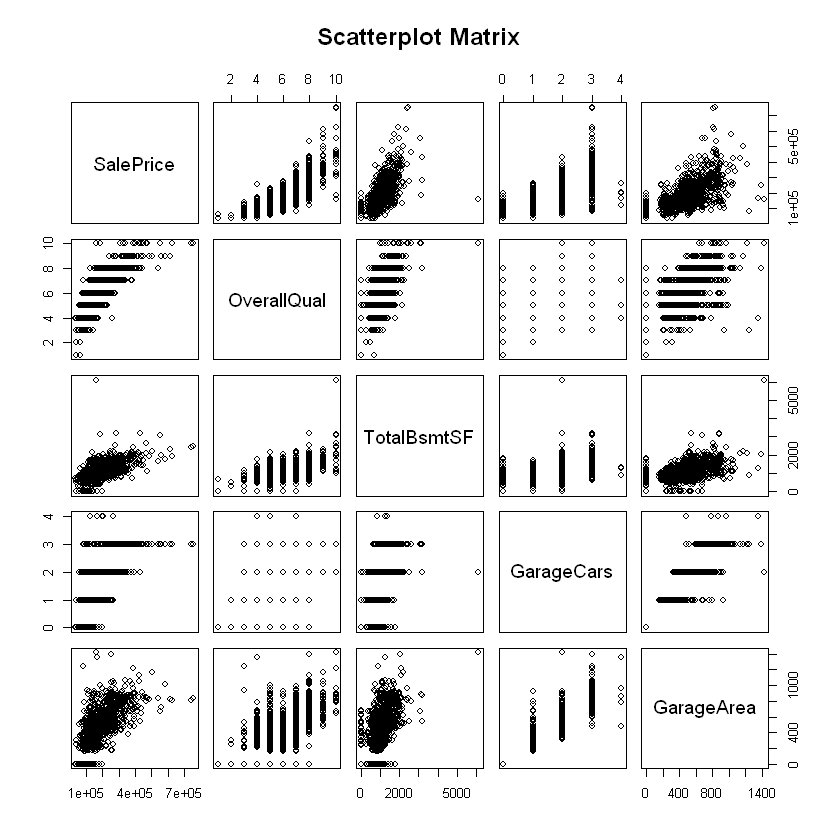

In [466]:
pairs(~SalePrice+OverallQual+TotalBsmtSF+GarageCars+GarageArea,data=final_d_train,
      main="Scatterplot Matrix")

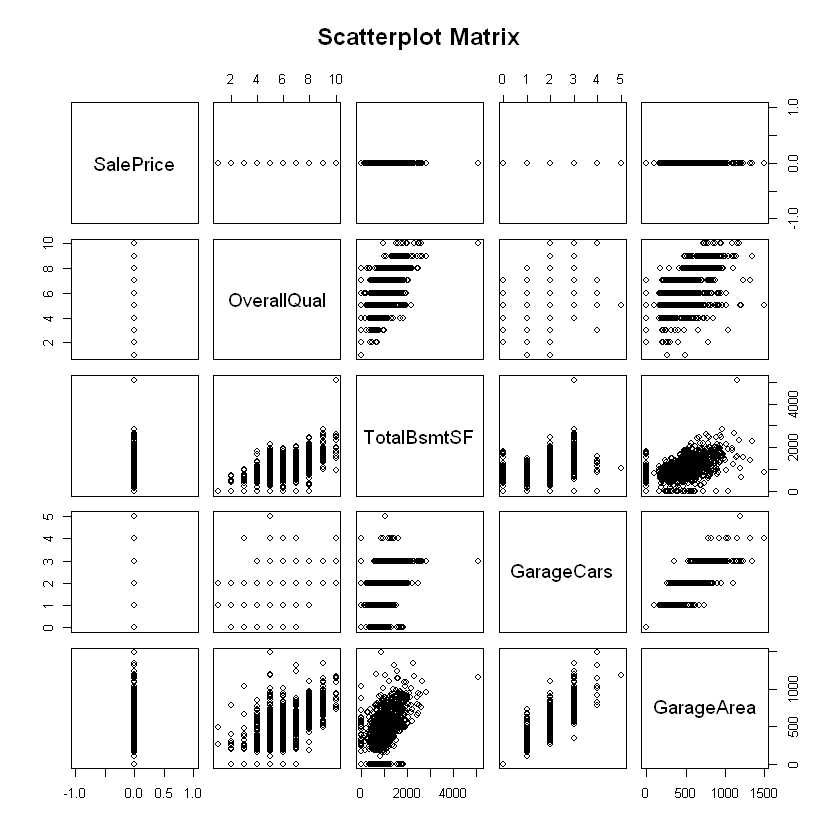

In [467]:
pairs(~SalePrice+OverallQual+TotalBsmtSF+GarageCars+GarageArea,data=final_d_test,
      main="Scatterplot Matrix")

## Model Selection

firstly let's split the data for training my model

In [459]:
library(caret)

In [468]:
## modo figo per samplare lontano dai dati del training
library(mlbench)
testing <- scale(final_data_train)
startSet <- sample(1:dim(testing)[1], 1000)
samplePool <- testing[-startSet,]
start <- testing[startSet,]
newSamp <- maxDissim(start, samplePool, n = 20)
newSamp

Warning message:
"package 'mlbench' was built under R version 3.4.3"

In [485]:
train_index <- sample(1:dim(final_data_train)[1], 1000)
test_xgb <- final_data_train[-startSet,
                             -which(colnames(final_data_train)==non_exploitable_columns)]
train_xgb <- final_data_train[startSet,
                             -which(colnames(final_data_train)==non_exploitable_columns)]

In [486]:
require(xgboost)
train<- as.matrix(train_xgb, rownames.force=NA)
test<- as.matrix(test_xgb, rownames.force=NA)
train <- as(train, "sparseMatrix")
test <- as(test, "sparseMatrix")

In [489]:
# Never forget to exclude objective variable in 'data option'
dtrain <- xgb.DMatrix(data = train, label = final_d_train$SalePrice[startSet])
dtest <- xgb.DMatrix(data = test , label = final_d_train$SalePrice[-startSet])

In [496]:
nround <- 300
param <- list(max_depth=20, eta=0.5, silent=0, nthread=2, objective='reg:linear', verbose=0)

cat('running cross validation\n')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
xgb.cv(param, dtrain, nround, nfold=5, metrics={'error'})

running cross validation
[1]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[2]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[3]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[4]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[5]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[6]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[7]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[8]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[9]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[10]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[11]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5841.183137 
[12]	train-error:-177269.293750+1460.293633	test-error:-177269.290625+5

In [429]:
install.packages('gtools', repos = "http://cran.stat.unipd.it/")

package 'gtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Umbertojunior\AppData\Local\Temp\RtmpAbjkaz\downloaded_packages
